In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('speaking_experiment.csv')  # Replace with your actual file path

# Step 1: Remove outliers (>10,000 ms)
df = df[df['response_time_ms'] <= 10000]

# Step 2: Fix word frequency errors
df.loc[df['word'].isin(['собака', 'собакой']), 'word_frequency'] = 45
df.loc[df['word'] == 'книга', 'word_frequency'] = 60

# Save cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Calculate mean response times
mean_rt = df.groupby(['sentence_type', 'language_proficiency'])['response_time_ms'].mean().reset_index()

# Display results
print(mean_rt)

     sentence_type language_proficiency  response_time_ms
0  Canonical (SVO)             advanced       2148.940741
1  Canonical (SVO)             beginner       3395.176190
2  Canonical (SVO)         intermediate       2714.488889
3    Non-Canonical             advanced       2758.442112
4    Non-Canonical             beginner       3366.610940
5    Non-Canonical         intermediate       2743.482832


In [ ]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Label simple (IDs 1–4) vs. complex (IDs 5–10) sentences
df['complexity'] = df['sentence_id'].apply(lambda x: 'Simple' if x in [1, 2, 3, 4] else 'Complex')

# Calculate mean response times by complexity and proficiency
mean_rt = df.groupby(['complexity', 'language_proficiency'])['response_time_ms'].mean().reset_index()

# Display results
print(mean_rt)

  complexity language_proficiency  response_time_ms
0    Complex             advanced       2943.843281
1    Complex             beginner       3572.707889
2    Complex         intermediate       2865.876540
3     Simple             advanced       2183.591449
4     Simple             beginner       2802.078571
5     Simple         intermediate       2404.751389


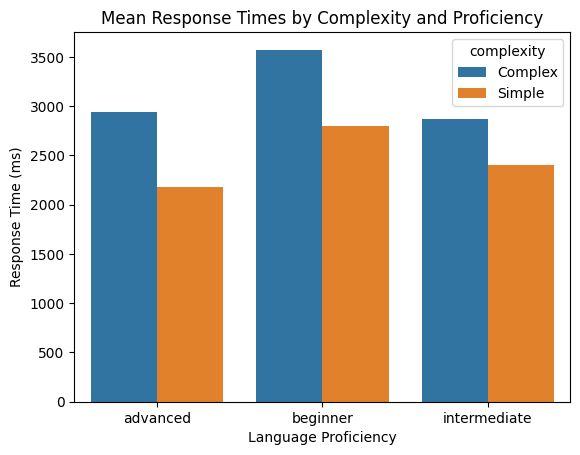

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load mean response times (from your output)
data = {
    'complexity': ['Complex', 'Complex', 'Complex', 'Simple', 'Simple', 'Simple'],
    'language_proficiency': ['advanced', 'beginner', 'intermediate', 'advanced', 'beginner', 'intermediate'],
    'response_time_ms': [2943.843281, 3572.707889, 2865.876540, 2183.591449, 2802.078571, 2404.751389]
}
df = pd.DataFrame(data)

# Create bar plot
sns.barplot(x='language_proficiency', y='response_time_ms', hue='complexity', data=df)
plt.title('Mean Response Times by Complexity and Proficiency')
plt.xlabel('Language Proficiency')
plt.ylabel('Response Time (ms)')
plt.show()

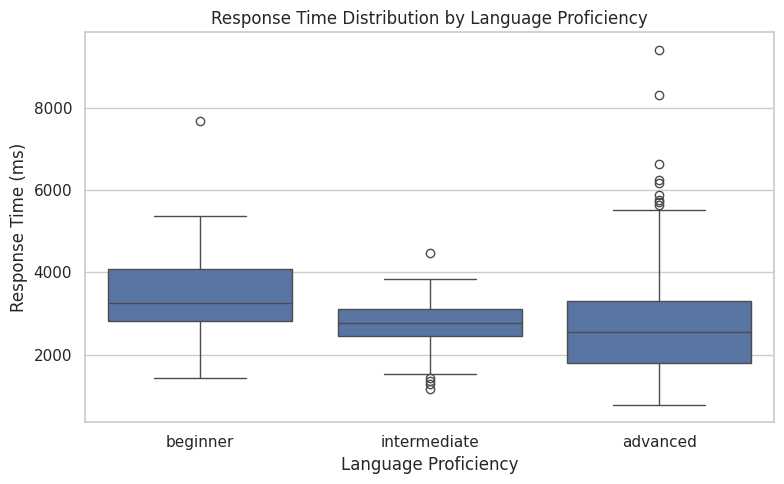

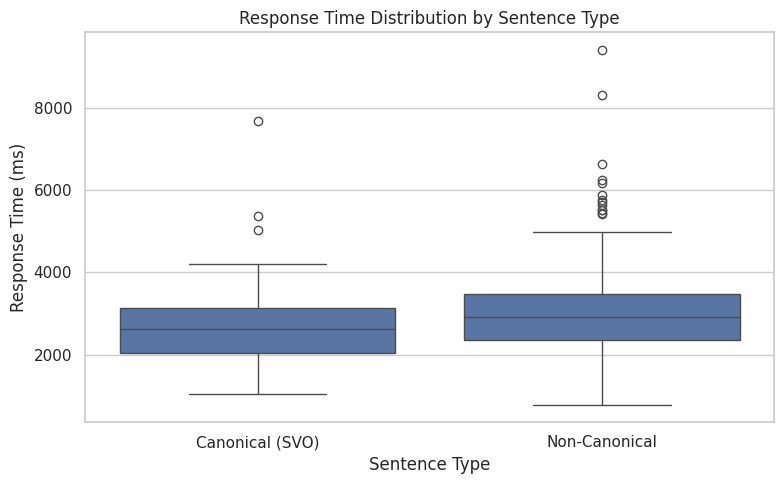

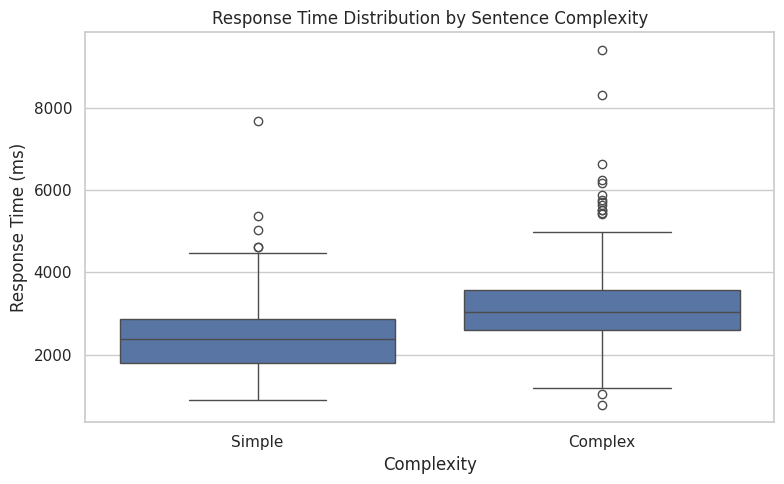

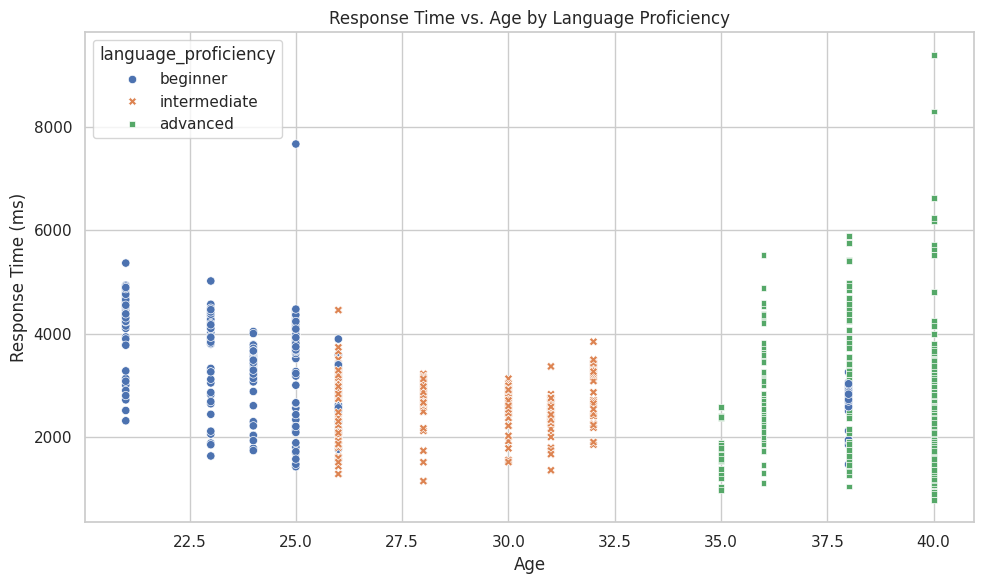

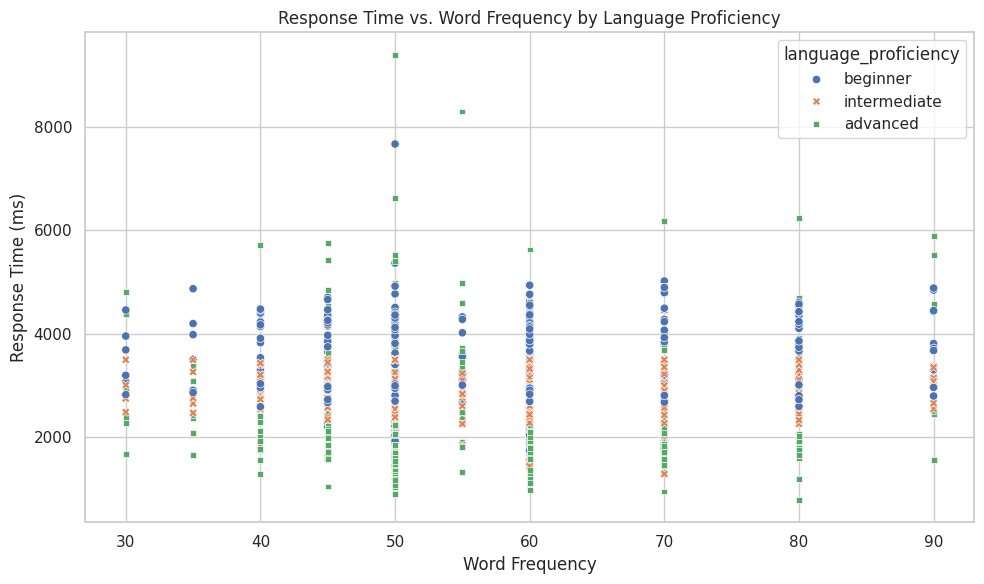

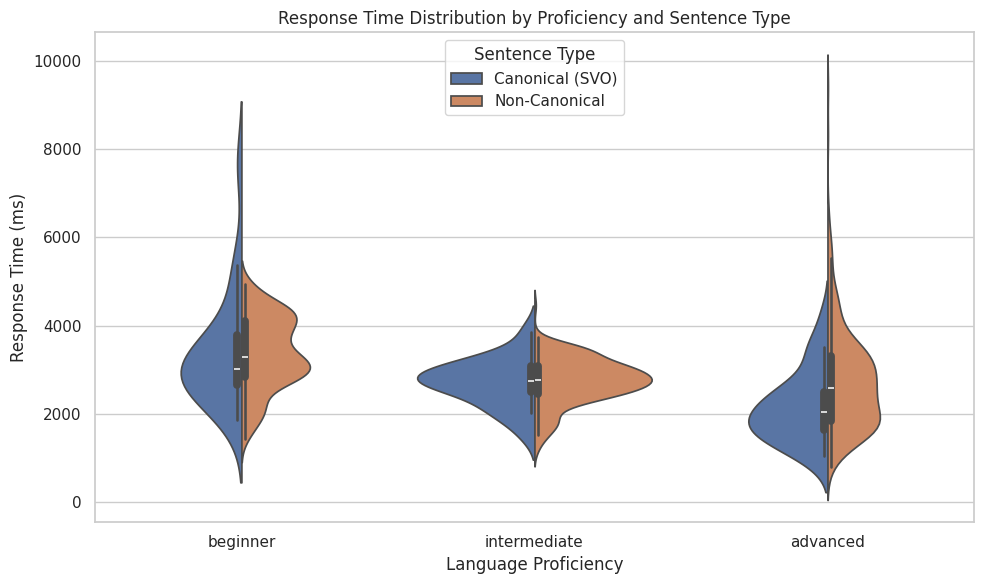

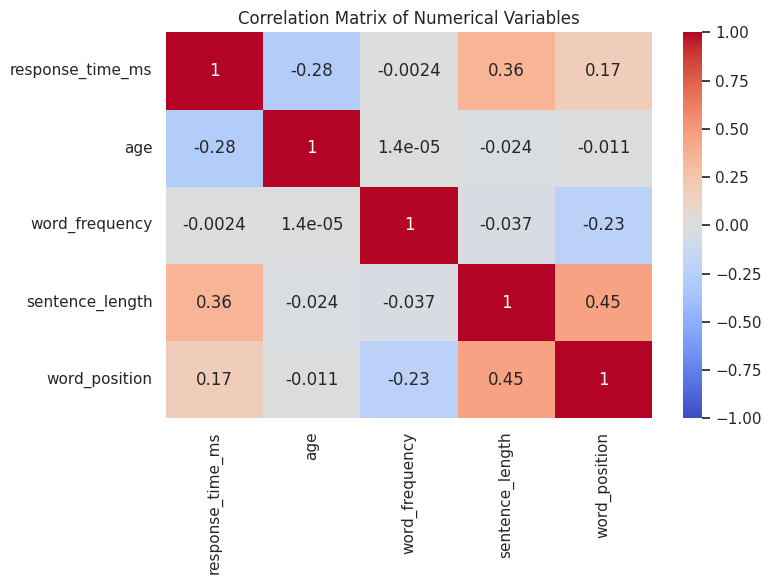

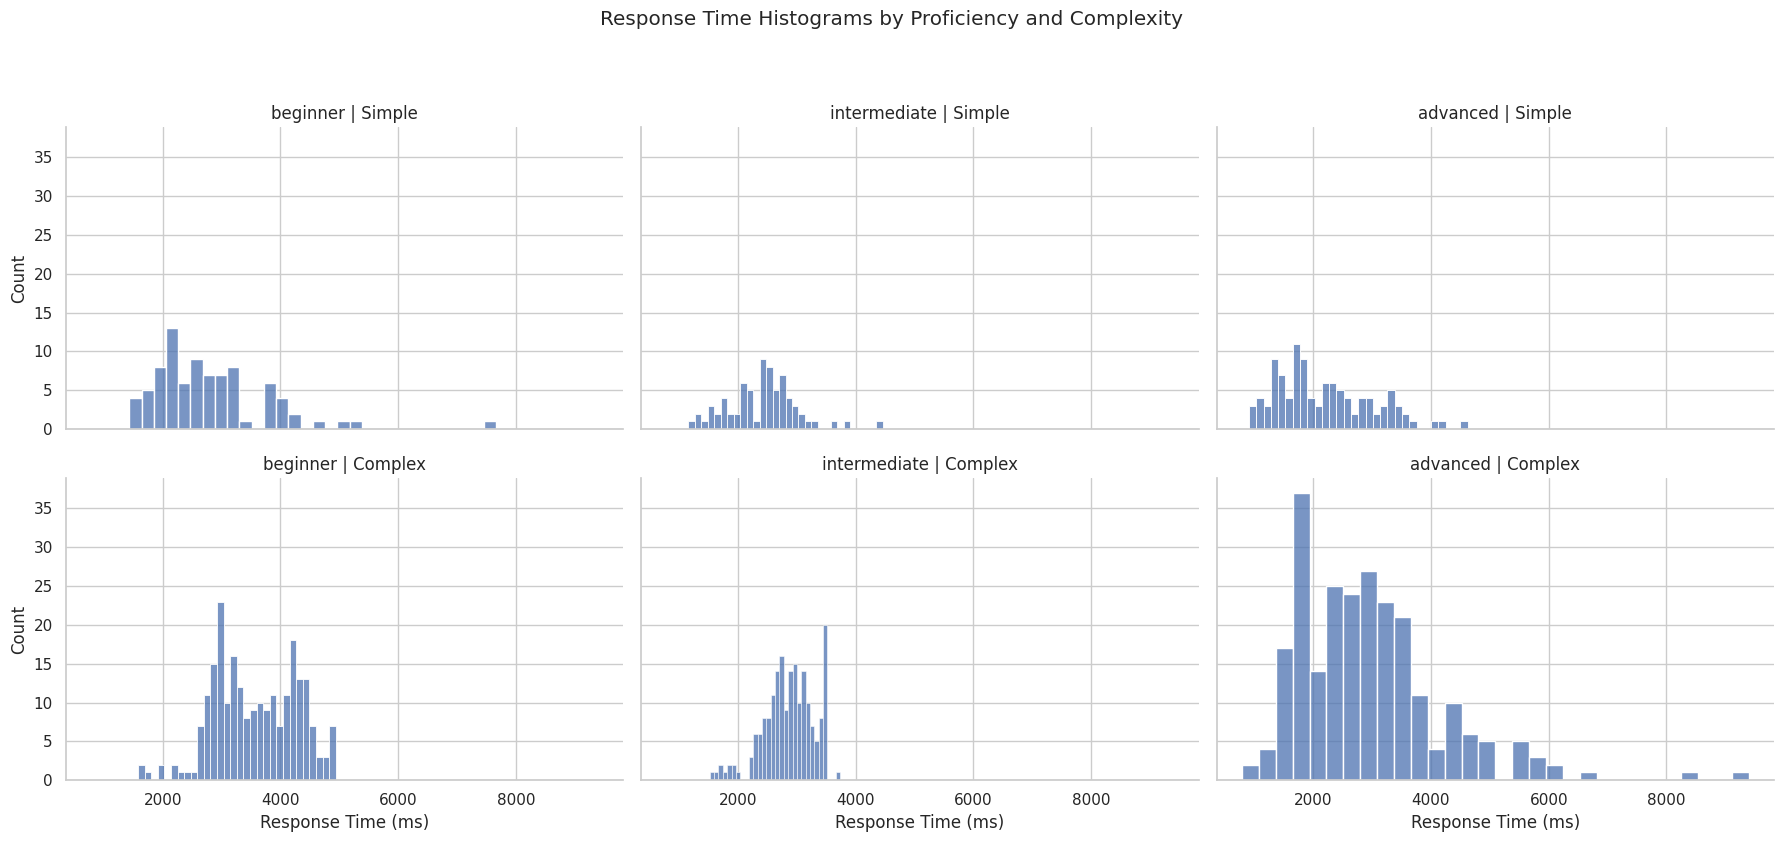

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style for clarity
sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Add complexity column
df['complexity'] = df['sentence_id'].apply(lambda x: 'Simple' if x in [1, 2, 3, 4] else 'Complex')

# Visualization 1: Box Plot of Response Times by Proficiency
plt.figure(figsize=(8, 5))
sns.boxplot(x='language_proficiency', y='response_time_ms', data=df, order=['beginner', 'intermediate', 'advanced'])
plt.title('Response Time Distribution by Language Proficiency')
plt.xlabel('Language Proficiency')
plt.ylabel('Response Time (ms)')
plt.tight_layout()
plt.show()

# Visualization 2: Box Plot of Response Times by Sentence Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentence_type', y='response_time_ms', data=df)
plt.title('Response Time Distribution by Sentence Type')
plt.xlabel('Sentence Type')
plt.ylabel('Response Time (ms)')
plt.tight_layout()
plt.show()

# Visualization 3: Box Plot of Response Times by Complexity
plt.figure(figsize=(8, 5))
sns.boxplot(x='complexity', y='response_time_ms', data=df)
plt.title('Response Time Distribution by Sentence Complexity')
plt.xlabel('Complexity')
plt.ylabel('Response Time (ms)')
plt.tight_layout()
plt.show()

# Visualization 4: Scatter Plot of Response Time vs. Age, Colored by Proficiency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='response_time_ms', hue='language_proficiency', style='language_proficiency', data=df,
                hue_order=['beginner', 'intermediate', 'advanced'])
plt.title('Response Time vs. Age by Language Proficiency')
plt.xlabel('Age')
plt.ylabel('Response Time (ms)')
plt.tight_layout()
plt.show()

# Visualization 5: Scatter Plot of Response Time vs. Word Frequency, Colored by Proficiency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_frequency', y='response_time_ms', hue='language_proficiency', style='language_proficiency', data=df,
                hue_order=['beginner', 'intermediate', 'advanced'])
plt.title('Response Time vs. Word Frequency by Language Proficiency')
plt.xlabel('Word Frequency')
plt.ylabel('Response Time (ms)')
plt.tight_layout()
plt.show()

# Visualization 6: Violin Plot of Response Times by Proficiency and Sentence Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='language_proficiency', y='response_time_ms', hue='sentence_type', split=True, data=df,
               order=['beginner', 'intermediate', 'advanced'])
plt.title('Response Time Distribution by Proficiency and Sentence Type')
plt.xlabel('Language Proficiency')
plt.ylabel('Response Time (ms)')
plt.legend(title='Sentence Type')
plt.tight_layout()
plt.show()

# Visualization 7: Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
corr = df[['response_time_ms', 'age', 'word_frequency', 'sentence_length', 'word_position']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Visualization 8: Facet Grid of Response Time Histograms by Proficiency and Complexity
g = sns.FacetGrid(df, col='language_proficiency', row='complexity', height=4, aspect=1.5,
                  col_order=['beginner', 'intermediate', 'advanced'])
g.map(sns.histplot, 'response_time_ms', bins=30)
g.set_titles('{col_name} | {row_name}')
g.set_axis_labels('Response Time (ms)', 'Count')
g.fig.suptitle('Response Time Histograms by Proficiency and Complexity', y=1.05)
plt.tight_layout()
plt.show()

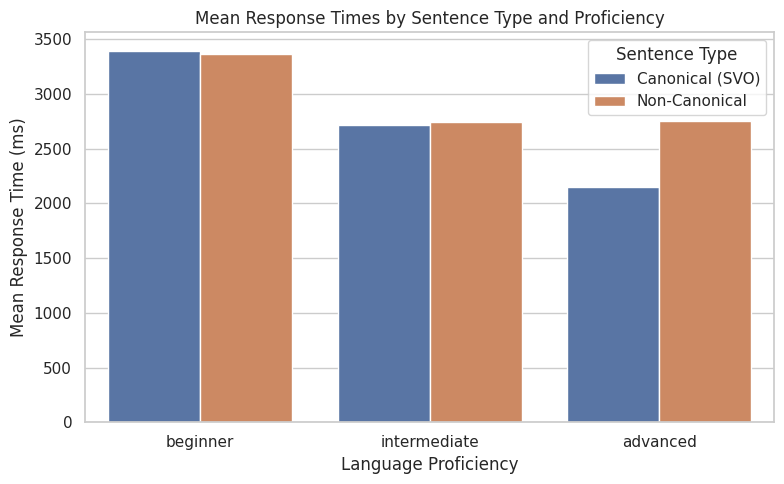

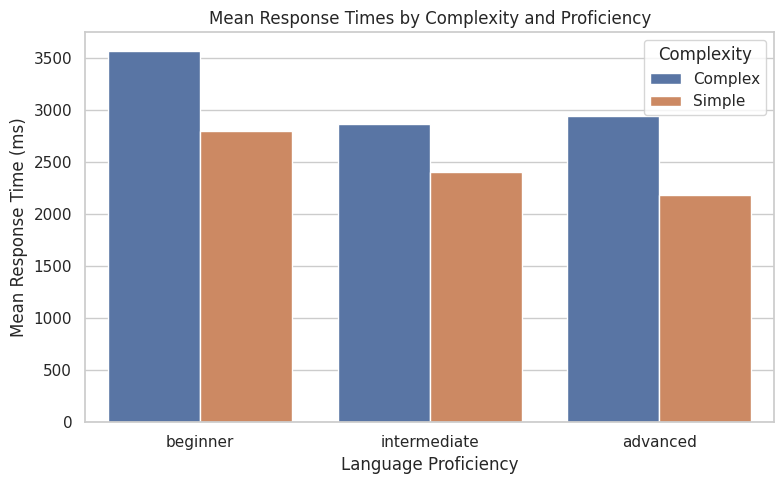

<Figure size 1000x600 with 0 Axes>

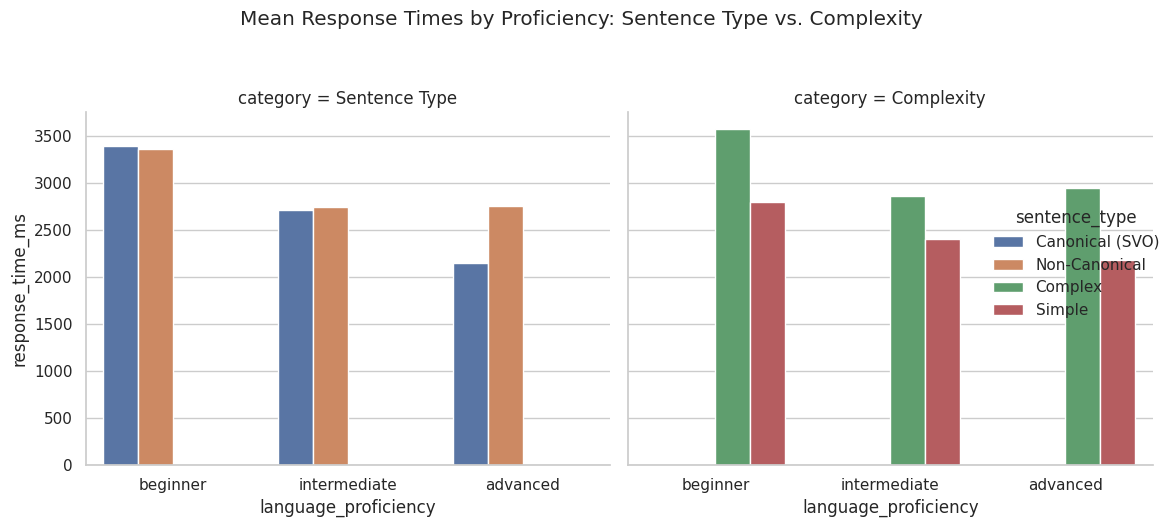

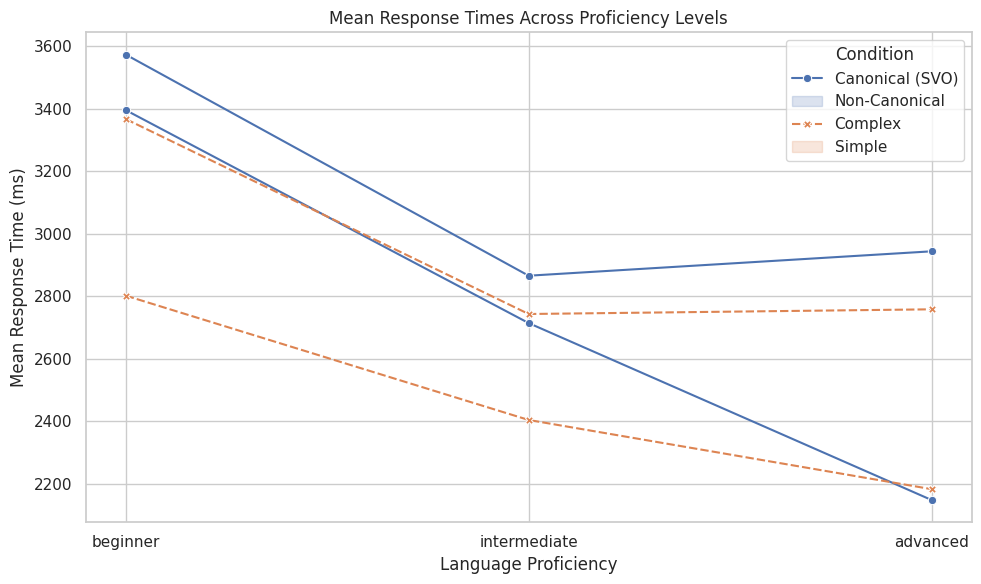

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style for clarity
sns.set(style="whitegrid")

# Data for sentence type
sentence_data = {
    'sentence_type': ['Canonical (SVO)', 'Canonical (SVO)', 'Canonical (SVO)',
                     'Non-Canonical', 'Non-Canonical', 'Non-Canonical'],
    'language_proficiency': ['advanced', 'beginner', 'intermediate',
                            'advanced', 'beginner', 'intermediate'],
    'response_time_ms': [2148.9407407407407, 3395.17619047619, 2714.488888888889,
                        2758.442112311071, 3366.610939623507, 2743.482832221809]
}
sentence_df = pd.DataFrame(sentence_data)

# Data for complexity
complexity_data = {
    'complexity': ['Complex', 'Complex', 'Complex', 'Simple', 'Simple', 'Simple'],
    'language_proficiency': ['advanced', 'beginner', 'intermediate',
                            'advanced', 'beginner', 'intermediate'],
    'response_time_ms': [2943.843281, 3572.707889, 2865.876540,
                        2183.591449, 2802.078571, 2404.751389]
}
complexity_df = pd.DataFrame(complexity_data)

# Ensure language_proficiency order for plotting
proficiency_order = ['beginner', 'intermediate', 'advanced']
sentence_df['language_proficiency'] = pd.Categorical(sentence_df['language_proficiency'],
                                                   categories=proficiency_order, ordered=True)
complexity_df['language_proficiency'] = pd.Categorical(complexity_df['language_proficiency'],
                                                     categories=proficiency_order, ordered=True)

# Visualization 1: Bar Plot for Sentence Type
plt.figure(figsize=(8, 5))
sns.barplot(x='language_proficiency', y='response_time_ms', hue='sentence_type',
            data=sentence_df)
plt.title('Mean Response Times by Sentence Type and Proficiency')
plt.xlabel('Language Proficiency')
plt.ylabel('Mean Response Time (ms)')
plt.legend(title='Sentence Type')
plt.tight_layout()
plt.show()

# Visualization 2: Bar Plot for Complexity
plt.figure(figsize=(8, 5))
sns.barplot(x='language_proficiency', y='response_time_ms', hue='complexity',
            data=complexity_df)
plt.title('Mean Response Times by Complexity and Proficiency')
plt.xlabel('Language Proficiency')
plt.ylabel('Mean Response Time (ms)')
plt.legend(title='Complexity')
plt.tight_layout()
plt.show()

# Visualization 3: Grouped Bar Plot for Sentence Type and Complexity
# Combine data for grouped plot
combined_df = pd.concat([
    sentence_df.assign(category='Sentence Type'),
    complexity_df.rename(columns={'complexity': 'sentence_type'}).assign(category='Complexity')
])
combined_df['language_proficiency'] = pd.Categorical(combined_df['language_proficiency'],
                                                   categories=proficiency_order, ordered=True)
plt.figure(figsize=(10, 6))
sns.catplot(x='language_proficiency', y='response_time_ms', hue='sentence_type',
            col='category', kind='bar', data=combined_df, height=5, aspect=1)
plt.suptitle('Mean Response Times by Proficiency: Sentence Type vs. Complexity', y=1.05)
plt.tight_layout()
plt.show()

# Visualization 4: Line Plot for Sentence Type and Complexity
plt.figure(figsize=(10, 6))
sns.lineplot(x='language_proficiency', y='response_time_ms', hue='sentence_type',
             style='sentence_type', markers=True, data=sentence_df)
sns.lineplot(x='language_proficiency', y='response_time_ms', hue='complexity',
             style='complexity', markers=True, data=complexity_df, linestyle='--')
plt.title('Mean Response Times Across Proficiency Levels')
plt.xlabel('Language Proficiency')
plt.ylabel('Mean Response Time (ms)')
plt.legend(title='Condition', labels=['Canonical (SVO)', 'Non-Canonical', 'Complex', 'Simple'])
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Add complexity column
df['complexity'] = df['sentence_id'].apply(lambda x: 'Simple' if x in [1, 2, 3, 4] else 'Complex')

# ANOVA for response times by sentence type
anova_sentence = f_oneway(
    df[df['sentence_type'] == 'Canonical (SVO)']['response_time_ms'],
    df[df['sentence_type'] == 'Non-Canonical']['response_time_ms']
)

# ANOVA for response times by complexity
anova_complexity = f_oneway(
    df[df['complexity'] == 'Simple']['response_time_ms'],
    df[df['complexity'] == 'Complex']['response_time_ms']
)

# ANOVA for response times by proficiency
anova_proficiency = f_oneway(
    df[df['language_proficiency'] == 'beginner']['response_time_ms'],
    df[df['language_proficiency'] == 'intermediate']['response_time_ms'],
    df[df['language_proficiency'] == 'advanced']['response_time_ms']
)

# Print results
print(f"Sentence Type ANOVA: F={anova_sentence.statistic:.2f}, p={anova_sentence.pvalue:.4f}")
print(f"Complexity ANOVA: F={anova_complexity.statistic:.2f}, p={anova_complexity.pvalue:.4f}")
print(f"Proficiency ANOVA: F={anova_proficiency.statistic:.2f}, p={anova_proficiency.pvalue:.4f}")

Sentence Type ANOVA: F=4.53, p=0.0335
Complexity ANOVA: F=110.45, p=0.0000
Proficiency ANOVA: F=51.82, p=0.0000


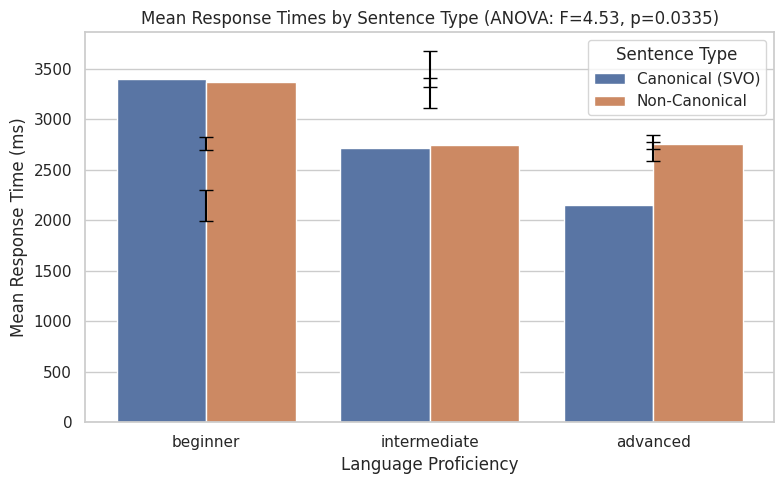

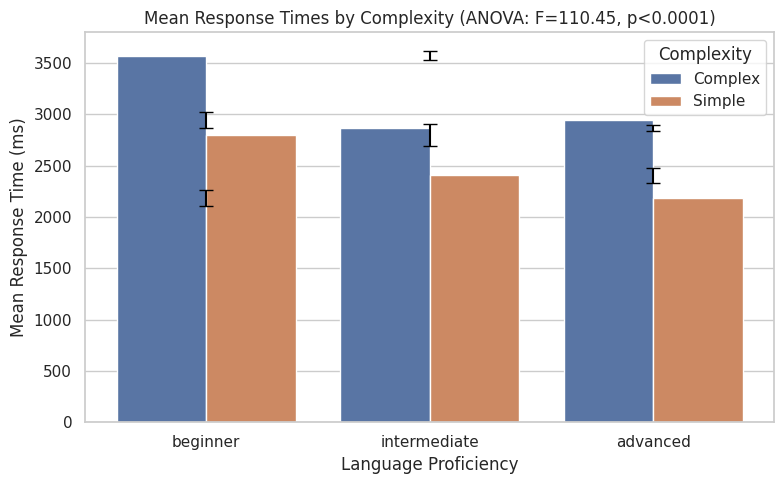

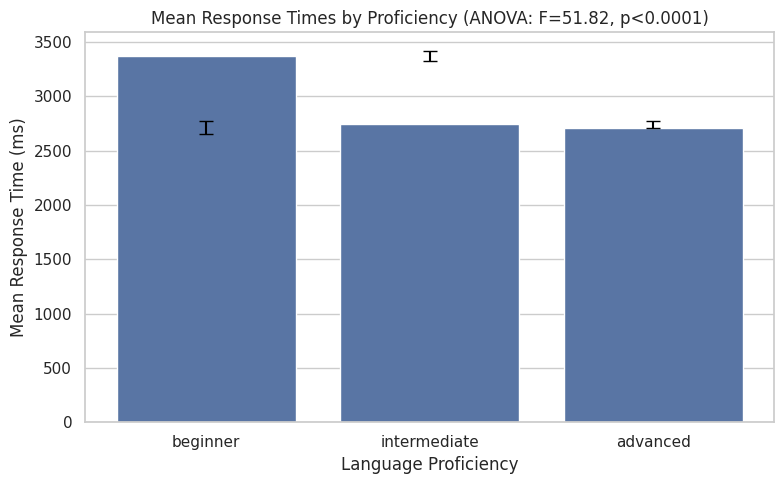

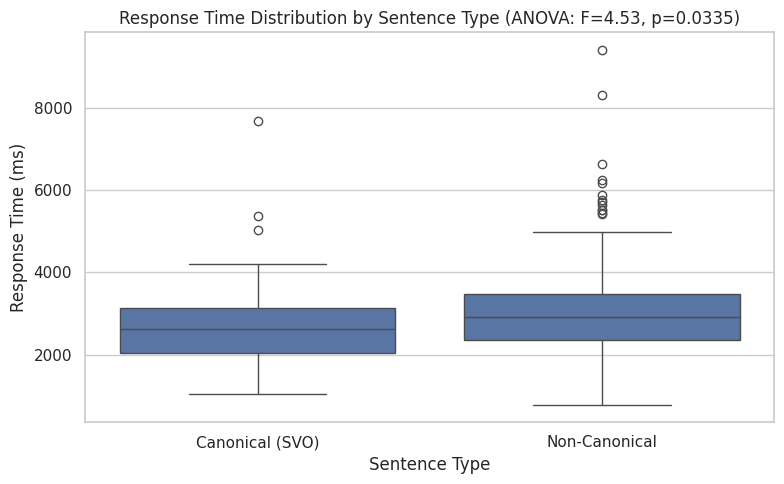

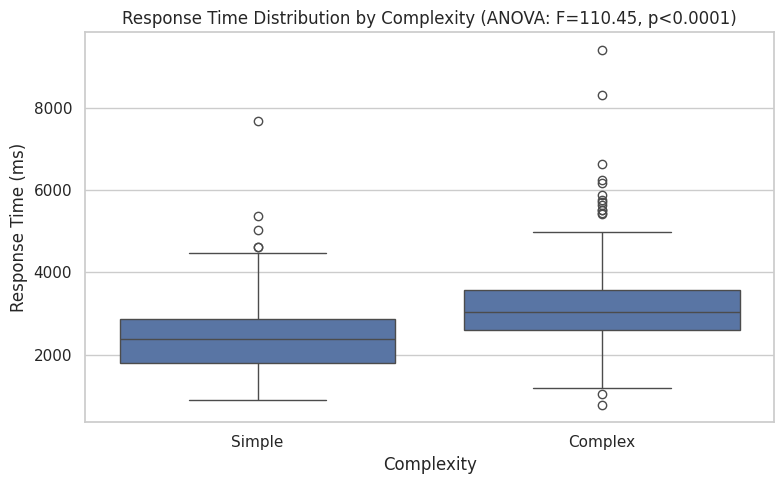

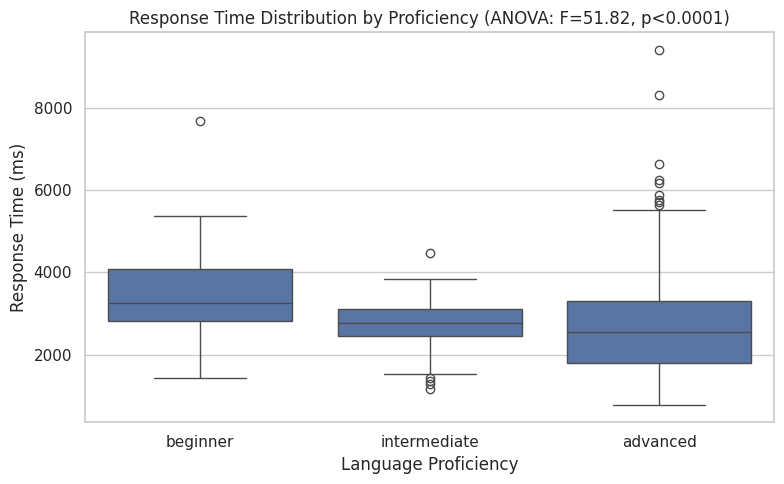

<Figure size 1000x600 with 0 Axes>

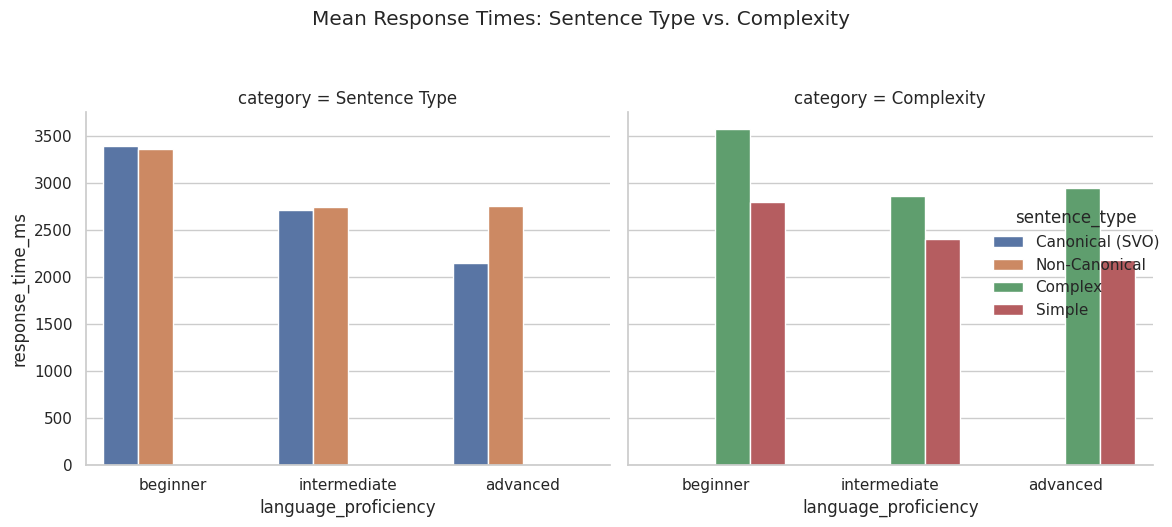

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set plot style for clarity
sns.set(style="whitegrid")

# Load cleaned dataset for box plots
df = pd.read_csv('cleaned_dataset.csv')  # Replace with your file path
df['complexity'] = df['sentence_id'].apply(lambda x: 'Simple' if x in [1, 2, 3, 4] else 'Complex')

# Data for sentence type
sentence_data = {
    'sentence_type': ['Canonical (SVO)', 'Canonical (SVO)', 'Canonical (SVO)',
                     'Non-Canonical', 'Non-Canonical', 'Non-Canonical'],
    'language_proficiency': ['advanced', 'beginner', 'intermediate',
                            'advanced', 'beginner', 'intermediate'],
    'response_time_ms': [2148.9407407407407, 3395.17619047619, 2714.488888888889,
                        2758.442112311071, 3366.610939623507, 2743.482832221809]
}
sentence_df = pd.DataFrame(sentence_data)

# Data for complexity
complexity_data = {
    'complexity': ['Complex', 'Complex', 'Complex', 'Simple', 'Simple', 'Simple'],
    'language_proficiency': ['advanced', 'beginner', 'intermediate',
                            'advanced', 'beginner', 'intermediate'],
    'response_time_ms': [2943.843281, 3572.707889, 2865.876540,
                        2183.591449, 2802.078571, 2404.751389]
}
complexity_df = pd.DataFrame(complexity_data)

# Calculate standard error for error bars
se_sentence = df.groupby(['sentence_type', 'language_proficiency'])['response_time_ms'].std() / np.sqrt(df.groupby(['sentence_type', 'language_proficiency']).size())
se_complexity = df.groupby(['complexity', 'language_proficiency'])['response_time_ms'].std() / np.sqrt(df.groupby(['complexity', 'language_proficiency']).size())
se_proficiency = df.groupby('language_proficiency')['response_time_ms'].std() / np.sqrt(df.groupby('language_proficiency').size())

# Visualization 1: Bar Plot for Sentence Type with Error Bars
plt.figure(figsize=(8, 5))
sns.barplot(x='language_proficiency', y='response_time_ms', hue='sentence_type',
            data=sentence_df, order=['beginner', 'intermediate', 'advanced'])
plt.errorbar(x=[0, 1, 2, 0, 1, 2], y=sentence_df['response_time_ms'],
             yerr=se_sentence.values, fmt='none', c='black', capsize=5)
plt.title('Mean Response Times by Sentence Type (ANOVA: F=4.53, p=0.0335)')
plt.xlabel('Language Proficiency')
plt.ylabel('Mean Response Time (ms)')
plt.legend(title='Sentence Type')
plt.tight_layout()
plt.show()

# Visualization 2: Bar Plot for Complexity with Error Bars
plt.figure(figsize=(8, 5))
sns.barplot(x='language_proficiency', y='response_time_ms', hue='complexity',
            data=complexity_df, order=['beginner', 'intermediate', 'advanced'])
plt.errorbar(x=[0, 1, 2, 0, 1, 2], y=complexity_df['response_time_ms'],
             yerr=se_complexity.values, fmt='none', c='black', capsize=5)
plt.title('Mean Response Times by Complexity (ANOVA: F=110.45, p<0.0001)')
plt.xlabel('Language Proficiency')
plt.ylabel('Mean Response Time (ms)')
plt.legend(title='Complexity')
plt.tight_layout()
plt.show()

# Visualization 3: Bar Plot for Proficiency with Error Bars
proficiency_data = df.groupby('language_proficiency')['response_time_ms'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='language_proficiency', y='response_time_ms', data=proficiency_data,
            order=['beginner', 'intermediate', 'advanced'])
plt.errorbar(x=[0, 1, 2], y=proficiency_data['response_time_ms'],
             yerr=se_proficiency.values, fmt='none', c='black', capsize=5)
plt.title('Mean Response Times by Proficiency (ANOVA: F=51.82, p<0.0001)')
plt.xlabel('Language Proficiency')
plt.ylabel('Mean Response Time (ms)')
plt.tight_layout()
plt.show()

# Visualization 4: Box Plot for Sentence Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentence_type', y='response_time_ms', data=df)
plt.title('Response Time Distribution by Sentence Type (ANOVA: F=4.53, p=0.0335)')
plt.xlabel('Sentence Type')
plt.ylabel('Response Time (ms)')
plt.tight_layout()
plt.show()

# Visualization 5: Box Plot for Complexity
plt.figure(figsize=(8, 5))
sns.boxplot(x='complexity', y='response_time_ms', data=df)
plt.title('Response Time Distribution by Complexity (ANOVA: F=110.45, p<0.0001)')
plt.xlabel('Complexity')
plt.ylabel('Response Time (ms)')
plt.tight_layout()
plt.show()

# Visualization 6: Box Plot for Proficiency
plt.figure(figsize=(8, 5))
sns.boxplot(x='language_proficiency', y='response_time_ms', data=df,
            order=['beginner', 'intermediate', 'advanced'])
plt.title('Response Time Distribution by Proficiency (ANOVA: F=51.82, p<0.0001)')
plt.xlabel('Language Proficiency')
plt.ylabel('Response Time (ms)')
plt.tight_layout()
plt.show()

# Visualization 7: Grouped Bar Plot for All Factors
combined_df = pd.concat([
    sentence_df.assign(category='Sentence Type'),
    complexity_df.rename(columns={'complexity': 'sentence_type'}).assign(category='Complexity')
])
plt.figure(figsize=(10, 6))
sns.catplot(x='language_proficiency', y='response_time_ms', hue='sentence_type',
            col='category', kind='bar', data=combined_df,
            order=['beginner', 'intermediate', 'advanced'], height=5, aspect=1)
plt.suptitle('Mean Response Times: Sentence Type vs. Complexity', y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Add complexity column
df['complexity'] = df['sentence_id'].apply(lambda x: 'Simple' if x in [1, 2, 3, 4] else 'Complex')

# Select features for transformer model
features = ['word_position', 'sentence_length', 'word_frequency', 'sentence_type',
            'language_proficiency', 'complexity', 'response_time_ms']
df_model = df[features]

# Encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=['sentence_type', 'language_proficiency', 'complexity'])

# Create perturbed dataset (e.g., shuffle word positions)
df_perturbed = df_encoded.copy()
df_perturbed['word_position'] = np.random.permutation(df_perturbed['word_position'])

# Save datasets for transformer training
df_encoded.to_csv('transformer_ready_dataset.csv', index=False)
df_perturbed.to_csv('transformer_perturbed_dataset.csv', index=False)

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load encoded datasets
df_encoded = pd.read_csv('transformer_ready_dataset.csv')
df_perturbed = pd.read_csv('transformer_perturbed_dataset.csv')

# Features and target
X = df_encoded.drop('response_time_ms', axis=1).values
y = df_encoded['response_time_ms'].values
X_perturbed = df_perturbed.drop('response_time_ms', axis=1).values
y_perturbed = df_perturbed['response_time_ms'].values

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
X_perturbed = scaler_X.transform(X_perturbed)
y_perturbed = scaler_y.transform(y_perturbed.reshape(-1, 1)).flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)
X_perturbed = torch.FloatTensor(X_perturbed)
y_perturbed = torch.FloatTensor(y_perturbed).reshape(-1, 1)

# Define improved transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim):
        super(TransformerModel, self).__init__()
        self.input_layer = nn.Linear(input_dim, 64)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=4, dim_feedforward=128, batch_first=True),
            num_layers=2
        )
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.transformer(x.unsqueeze(1)).squeeze(1)
        return self.fc(x)

# Initialize model, loss, and optimizer
model = TransformerModel(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Evaluate on test set
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f'Test Loss (Original): {test_loss.item():.4f}')

    # Evaluate on perturbed dataset
    predictions_perturbed = model(X_perturbed)
    perturbed_loss = criterion(predictions_perturbed, y_perturbed)
    print(f'Test Loss (Perturbed): {perturbed_loss.item():.4f}')

Epoch 0, Loss: 1.2640
Epoch 20, Loss: 0.7609
Epoch 40, Loss: 0.7242
Epoch 60, Loss: 0.7055
Epoch 80, Loss: 0.6995
Test Loss (Original): 0.9008
Test Loss (Perturbed): 0.7958


In [ ]:
import pandas as pd
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load datasets
df_encoded = pd.read_csv('transformer_ready_dataset.csv')
df_perturbed = pd.read_csv('transformer_perturbed_dataset.csv')

# Features and target
X_test = df_encoded.drop('response_time_ms', axis=1).values
y_test = df_encoded['response_time_ms'].values
X_perturbed = df_perturbed.drop('response_time_ms', axis=1).values

# Scale features and target
scaler_X = StandardScaler().fit(X_test)
scaler_y = StandardScaler().fit(y_test.reshape(-1, 1))
X_test = scaler_X.transform(X_test)
X_perturbed = scaler_X.transform(X_perturbed)

# Convert to tensors
X_test = torch.FloatTensor(X_test)
X_perturbed = torch.FloatTensor(X_perturbed)

# Assume model is trained (from previous code)
model.eval()
with torch.no_grad():
    pred_original = scaler_y.inverse_transform(model(X_test).numpy())  # Unscale predictions
    pred_perturbed = scaler_y.inverse_transform(model(X_perturbed).numpy())

# Calculate prediction errors
errors_original = np.abs(pred_original.flatten() - y_test)
errors_perturbed = np.abs(pred_perturbed.flatten() - y_test)

# Print mean absolute errors
print(f"Mean Absolute Error (Original): {np.mean(errors_original):.2f} ms")
print(f"Mean Absolute Error (Perturbed): {np.mean(errors_perturbed):.2f} ms")

# Feature importance via permutation
feature_names = df_encoded.drop('response_time_ms', axis=1).columns
importance = []
model.eval()
for i in range(X_test.shape[1]):
    X_temp = X_test.clone()
    permuted = np.random.permutation(X_temp[:, i].numpy())
    X_temp[:, i] = torch.FloatTensor(permuted)  # Convert back to tensor
    with torch.no_grad():  # Disable gradient tracking
        pred_temp = scaler_y.inverse_transform(model(X_temp).detach().numpy())  # Use detach()
    error = np.mean(np.abs(pred_temp.flatten() - y_test))
    importance.append(error - np.mean(errors_original))

# Print feature importance
print("\nFeature Importance (Increase in Error):")
for name, imp in zip(feature_names, importance):
    print(f"{name}: {imp:.2f} ms")

Mean Absolute Error (Original): 595.16 ms
Mean Absolute Error (Perturbed): 634.02 ms

Feature Importance (Increase in Error):
word_position: 37.94 ms
sentence_length: 150.98 ms
word_frequency: 43.22 ms
sentence_type_Canonical (SVO): 6.84 ms
sentence_type_Non-Canonical: 9.50 ms
language_proficiency_advanced: 26.63 ms
language_proficiency_beginner: 84.43 ms
language_proficiency_intermediate: 8.33 ms
complexity_Complex: 22.64 ms
complexity_Simple: 32.32 ms


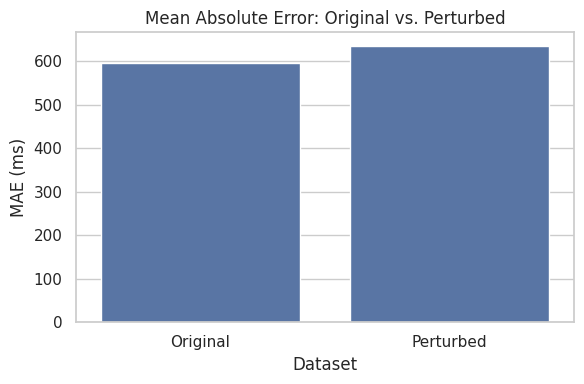

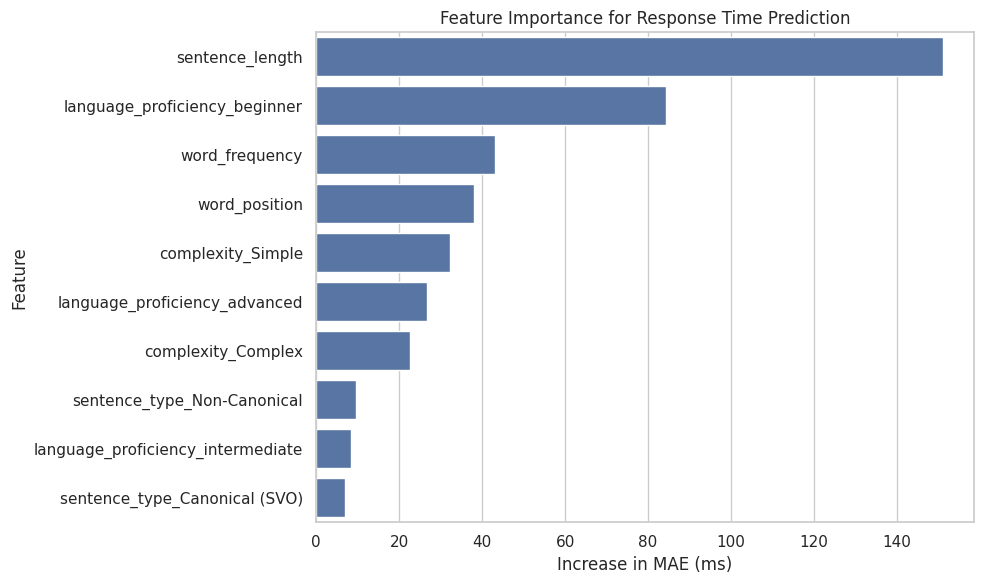

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from output
errors = {
    'Dataset': ['Original', 'Perturbed'],
    'MAE': [595.16, 634.02]
}
features = {
    'Feature': ['word_position', 'sentence_length', 'word_frequency',
                'sentence_type_Canonical (SVO)', 'sentence_type_Non-Canonical',
                'language_proficiency_advanced', 'language_proficiency_beginner',
                'language_proficiency_intermediate', 'complexity_Complex', 'complexity_Simple'],
    'Importance': [37.94, 150.98, 43.22, 6.84, 9.50, 26.63, 84.43, 8.33, 22.64, 32.32]
}
errors_df = pd.DataFrame(errors)
features_df = pd.DataFrame(features)

# Visualization 1: Bar Plot for Prediction Errors
plt.figure(figsize=(6, 4))
sns.barplot(x='Dataset', y='MAE', data=errors_df)
plt.title('Mean Absolute Error: Original vs. Perturbed')
plt.ylabel('MAE (ms)')
plt.tight_layout()
plt.show()

# Visualization 2: Bar Plot for Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.sort_values('Importance', ascending=False))
plt.title('Feature Importance for Response Time Prediction')
plt.xlabel('Increase in MAE (ms)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

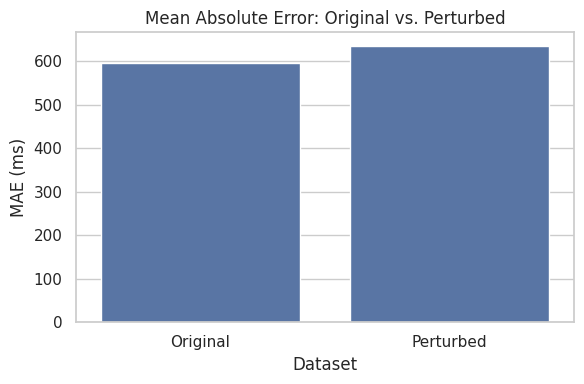

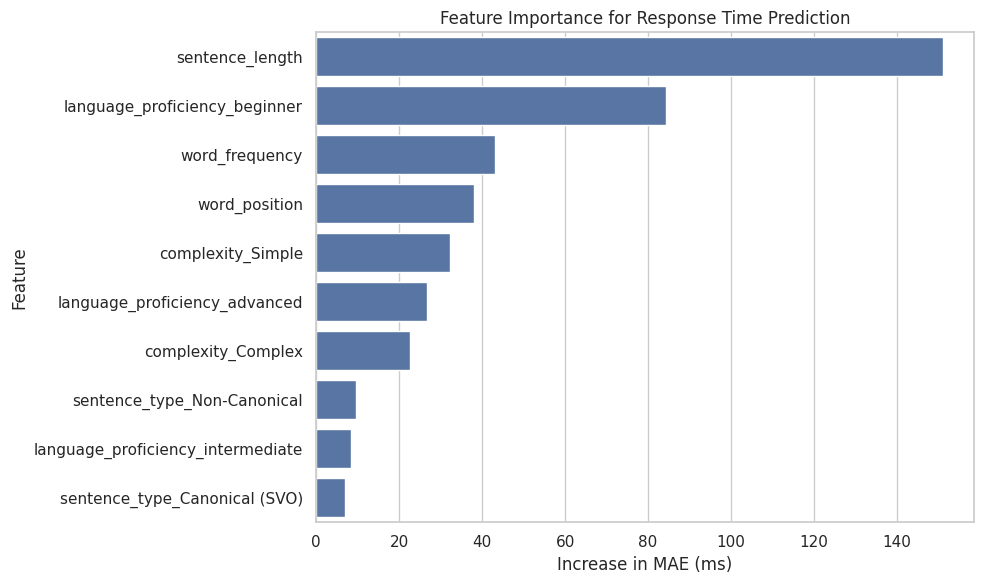

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# MAE data
errors = {
    'Dataset': ['Original', 'Perturbed'],
    'MAE': [595.16, 634.02]
}
errors_df = pd.DataFrame(errors)

# Feature importance data
features = {
    'Feature': ['word_position', 'sentence_length', 'word_frequency',
                'sentence_type_Canonical (SVO)', 'sentence_type_Non-Canonical',
                'language_proficiency_advanced', 'language_proficiency_beginner',
                'language_proficiency_intermediate', 'complexity_Complex', 'complexity_Simple'],
    'Importance': [37.94, 150.98, 43.22, 6.84, 9.50, 26.63, 84.43, 8.33, 22.64, 32.32]
}
features_df = pd.DataFrame(features)

# Plot MAE
plt.figure(figsize=(6, 4))
sns.barplot(x='Dataset', y='MAE', data=errors_df)
plt.title('Mean Absolute Error: Original vs. Perturbed')
plt.ylabel('MAE (ms)')
plt.tight_layout()
plt.savefig('mae_bar.png')  # Save for slides
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df.sort_values('Importance', ascending=False))
plt.title('Feature Importance for Response Time Prediction')
plt.xlabel('Increase in MAE (ms)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')  # Save for slides
plt.show()